# Objectifs

- Apprentissage de fonctions de $\mathbb{R}$ dans $\mathbb{R}$ par des polynômes via l'erreur quadratique.
- Optimisation via scipy.optimize.
- Organisation du code en objets.
- Utilisation de scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import minimize

In [23]:
plt.rcParams["figure.figsize"] = (12, 8)

## Génération de l'échantillon

In [3]:
a, b = -1, 1

In [4]:
def cible(x):
    return np.exp(-20 * x ** 2)
    

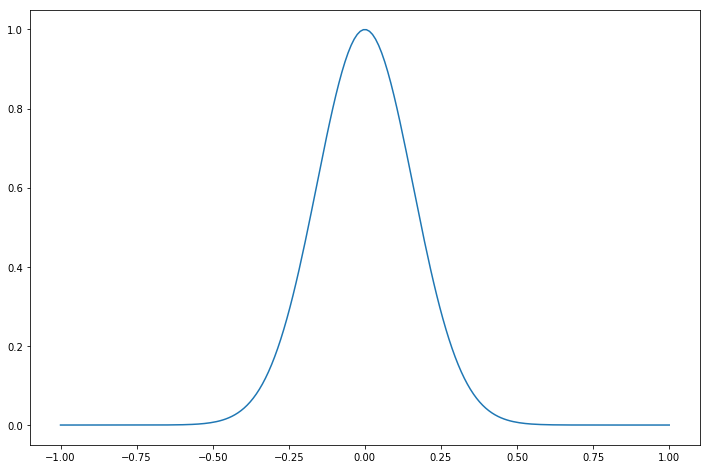

In [24]:
xs = np.linspace(a, b, 200)
ys = cible(xs)
plt.plot(xs, ys)

In [6]:
nb_points = 20
points = np.random.uniform(a, b, size=(nb_points))

In [7]:
valeurs = cible(points)

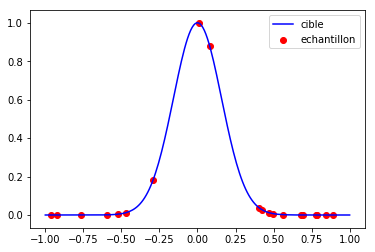

In [9]:
xs = np.linspace(a, b, 200)
ys = cible(xs)
plt.plot(xs, ys, color="blue", label="cible")
plt.scatter(points, valeurs, color="red", label="echantillon")
plt.legend()

## Apprentissage

In [10]:
degres = 5

def erreur(coefficients):
    return sum(
        (
            sum( 
                coefficient * point ** k
                for k, coefficient in enumerate(coefficients)
            )
            - valeur
        ) ** 2 / 2  
        for point, valeur in zip(points, valeurs)
    )

In [12]:
resultat = minimize(erreur, np.zeros(shape=(degres + 1)))

In [14]:
print(resultat)

      fun: 0.224119825436573
 hess_inv: array([[ 2.89832334e-01, -2.63556204e-02, -1.33285521e+00,
         2.41925018e-01,  1.22890967e+00, -1.72602673e-01],
       [-2.63556204e-02,  4.28702410e+00, -6.71783373e-01,
        -1.77837310e+01,  1.73841983e+00,  1.56598134e+01],
       [-1.33285521e+00, -6.71783373e-01,  9.26863254e+00,
         1.87493199e+00, -1.00374975e+01, -2.25803031e+00],
       [ 2.41925018e-01, -1.77837310e+01,  1.87493199e+00,
         8.03935997e+01, -7.21213791e+00, -7.34175723e+01],
       [ 1.22890967e+00,  1.73841983e+00, -1.00374975e+01,
        -7.21213791e+00,  1.20256346e+01,  7.58985602e+00],
       [-1.72602673e-01,  1.56598134e+01, -2.25803031e+00,
        -7.34175723e+01,  7.58985602e+00,  6.86542386e+01]])
      jac: array([ 1.86264515e-08, -2.25380063e-07, -7.67409801e-07, -8.10250640e-07,
        3.63215804e-07, -8.12113285e-07])
  message: 'Optimization terminated successfully.'
     nfev: 208
      nit: 23
     njev: 26
   status: 0
  success:

In [17]:
coefficients_finaux = resultat.x

In [16]:
def evaluation_polynomial(x, coefficient):
    return sum(
        coefficient * x ** k 
        for k, coefficient in enumerate(coefficients)
    )

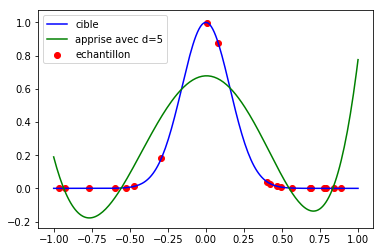

In [20]:
xs = np.linspace(a, b, 200)
ys = cible(xs)
plt.plot(xs, ys, color="blue", label="cible")
plt.scatter(points, valeurs, color="red", label="echantillon")
plt.plot(
    xs, 
    evaluation_polynomial(xs, coefficients_finaux), 
    color="green", 
    label=f"apprise avec d={degres}"
)
plt.legend()

In [19]:
erreur(coefficients_finaux)

0.224119825436573

## Reformatage du code

In [21]:
def apprentissage(degres):
    resultat = minimize(erreur, np.zeros(shape=(degres + 1)))
    def evaluation(x):
        return sum(
            coefficient * x ** k 
        for k, coefficient in enumerate(resultat.x)
    )
    return evaluation

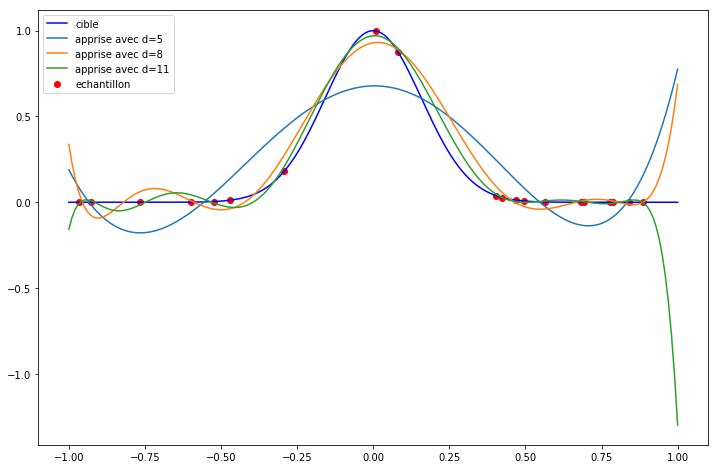

In [25]:
xs = np.linspace(a, b, 200)
ys = cible(xs)
plt.plot(xs, ys, color="blue", label="cible")
plt.scatter(points, valeurs, color="red", label="echantillon")
for degres in (5, 8, 11):
    evaluation = apprentissage(degres)
    plt.plot(
        xs, 
        evaluation(xs), 
        label=f"apprise avec d={degres}"
)
plt.legend()

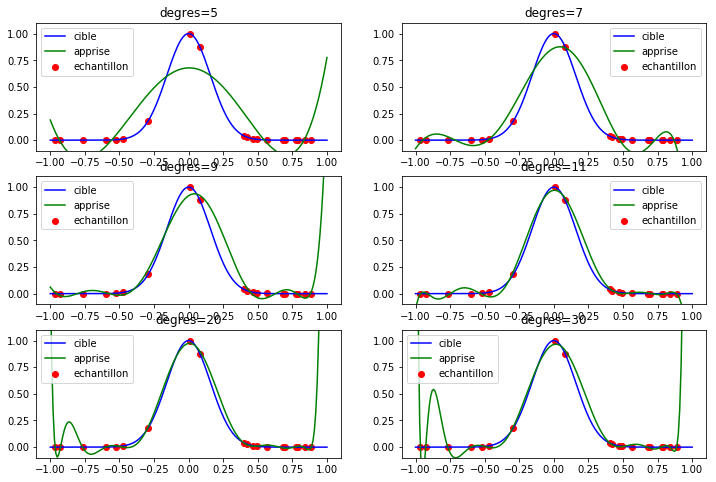

In [32]:
fig, axs = plt.subplots(ncols=2, nrows=3)
xs = np.linspace(a, b, 200)
ys = cible(xs)
for degres, ax in zip((5, 7, 9, 11, 20, 30), axs.flatten()):
    ax.plot(xs, ys, color="blue", label="cible")
    ax.scatter(points, valeurs, color="red", label="echantillon")  
    evaluation = apprentissage(degres)
    ax.plot(
        xs, 
        evaluation(xs), 
        label=f"apprise",
        color="green",
)
    ax.set_ylim(-0.1, 1.1)
    ax.set_title(f"degres={degres}")
    ax.legend()

**On constate qu'au début l'augmentation du degrés (et donc du nombre de paramètres libres du modèle) améliore l'apprentissage entre les deux courbes.**

**Au bout d'un moment on voit par contre que la fonction apprise est en parfaite adéquation avec l'échantillon mais pas en dehors.**

**C'est le surapprentissage. (Overfitting)**

**On commencera toujours pas séparer l'échantillon en deux. Une partie pour l'apprentissage et l'autre pour valider le modèle construit a posterriori.**

### Exercice

Générer un échantillon de 30 points que vous séparerez en deux parties `apprentissage` et `validation`. Puis regarder les évolutions des erreurs sur ces deux échantillons en fonction du degrés (de 1 à 30).

In [33]:
a, b = -1, 1
def cible(x):
    return np.exp(-20 * x ** 2)

In [34]:
points_apprentissage = np.random.uniform(a, b, size=(20))
points_test = np.random.uniform(a, b, size=(10))

In [35]:
valeurs_apprentissage = cible(points_apprentissage)
valeurs_test = cible(points_test)

In [36]:
def erreur_apprentissage(coefficients):
    return sum(
        (
            sum( 
                coefficient * point ** k
                for k, coefficient in enumerate(coefficients)
            )
            - valeur
        ) ** 2 / 2  
        for point, valeur in zip(points_apprentissage, valeurs_apprentissage)
    ) / 20

In [37]:
def erreur_test(coefficients):
    return sum(
        (
            sum( 
                coefficient * point ** k
                for k, coefficient in enumerate(coefficients)
            )
            - valeur
        ) ** 2 / 2  
        for point, valeur in zip(points_test, valeurs_test)
    ) / 10

In [38]:
def apprentissage(degres):
    resultat = minimize(fun=erreur_apprentissage, x0=np.zeros(shape=(degres + 1)))
    return resultat.x

In [39]:
erreurs_apprentissage = list()
erreurs_test = list()
for degres in range(1, 21):
    coefficients_optimaux = apprentissage(degres)
    erreurs_apprentissage.append(erreur_apprentissage(coefficients_optimaux))
    erreurs_test.append(erreur_test(coefficients_optimaux))


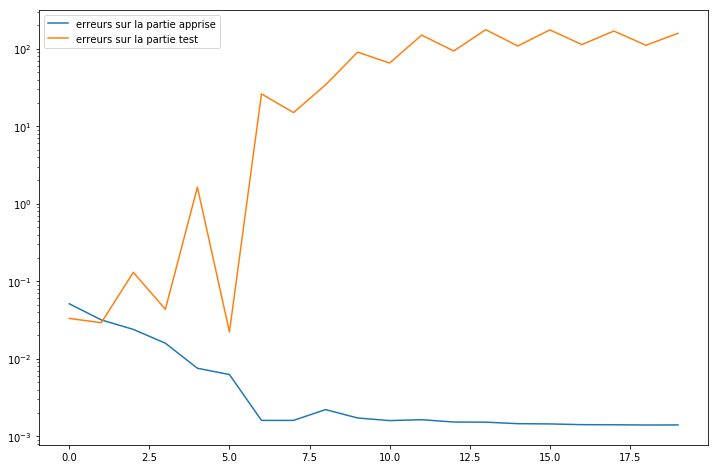

In [41]:
plt.semilogy(erreurs_apprentissage, label="erreurs sur la partie apprise")
plt.semilogy(erreurs_test, label="erreurs sur la partie test")
plt.legend()


In [59]:
class Echantillon:
    def __init__(
        self, 
        cible, 
        nb_apprentissage, 
        nb_validation,
        a,
        b,
    ):
        self.xs = np.linspace(a, b, 200)
        self.cible = cible
        self.points_app = np.random.uniform(a, b, size=(nb_apprentissage))
        self.points_val = np.random.uniform(a, b, size=(nb_validation))
        self.valeurs_app = self.cible(self.points_app)
        self.valeurs_val = self.cible(self.points_val)
        
    def erreur_app(self, fun):
        return sum(
            (fun(point) - valeur) ** 2 / 2 
            for point, valeur in zip(self.points_app, self.valeurs_app)
        ) / len(self.points_app)
            
    def erreur_val(self, fun):
        return sum(
            (fun(point) - valeur) ** 2 / 2 
            for point, valeur in zip(self.points_val, self.valeurs_val)
        ) / len(self.points_val)
    
    def affichage(self, ax):
        ax.plot(xs, self.cible(xs), label="cible")
        ax.scatter(self.points_app, self.valeurs_app, label="echantillon_apprentissage")
        ax.scatter(self.points_val, self.valeurs_val, label="echantillon_validation")

    

        

In [71]:
class Modele:
    def __init__(self, degres, echantillon):
        self.degres = degres
        self.echantillon = echantillon
        
    def apprentissage(self):
        def evaluation(coefficients):
            return self.echantillon.erreur_app(
                lambda x: sum(c * x ** k for k, c in enumerate(coefficients))
            )
        resultat = minimize(
            fun=evaluation,
            x0=np.zeros(shape=(self.degres))
        )
        self.coefficients = resultat.x
        
    def affichage(self, ax):
        self.valeurs = sum(
            c * self.echantillon.xs ** k
            for k, c in enumerate(self.coefficients)
        )
        ax.plot(
            self.echantillon.xs, 
            self.valeurs, 
            label=f"appris d={self.degres}"
        )
        
        
        

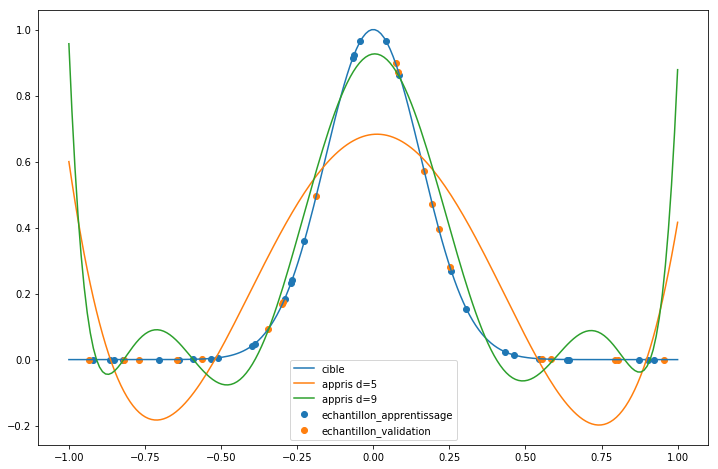

In [72]:
ech = Echantillon(
    cible=lambda x: np.exp(- 20 * x ** 2),
    a=-1,
    b=1,
    nb_apprentissage=30,
    nb_validation=20,
)
fig, ax = plt.subplots()
ech.affichage(ax)
m5 = Modele(degres=5, echantillon=ech)
m5.apprentissage()
m5.affichage(ax)
m9 = Modele(degres=9, echantillon=ech)
m9.apprentissage()
m9.affichage(ax)
ax.legend()

In [73]:
dir(ech)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'affichage',
 'cible',
 'erreur_app',
 'erreur_val',
 'points_app',
 'points_val',
 'valeurs_app',
 'valeurs_val',
 'xs']

# Exercices

- Agrandir les classes pour générer le graphe qui associent les erreurs au degrés